# Get Gray-Scale Histogram

This notebook demonstrates how to:
1. Import raw grayscale CT/microCT data
2. Generate and visualize histograms of intensity distributions
3. Create orthogonal slice views
4. Save figures to the output folder

## Import Required Modules

We'll use the Digital Rock Physics template package to handle data import, visualization, and analysis:

In [ ]:
import drp_template.input_output as io
import drp_template.image as image

## Load Grayscale Data

Set the file path and dimensions for the raw uint16 data file. This example uses a 50³ voxel cube of grayscale CT data.

**Parameters:**
- `raw_file_path`: Path to the raw binary file containing grayscale intensity values
- `dimensions`: Dictionary specifying the 3D dimensions (nz, ny, nx) of the dataset
- `dtype`: Data type of the raw file ('uint16' for 16-bit unsigned integer data)

In [5]:
# Set file paths and dimensions
raw_file_path = '../data/data_raw_uint16_50cube.raw'
dimensions = {'nz': 50, 'ny': 50, 'nx': 50}

# Import the raw data
# This will automatically generate a JSON parameter file with the same base name
data = io.import_model(file_path=raw_file_path, dtype='uint16', dimensions=dimensions)

# The parameter filename follows the naming convention: <base_filename>.json
# This file stores metadata about dimensions, data type, and analysis parameters

Parameters filename: data_raw_uint16_50cube.json
Reshaping data to the desired order (nx, ny, nz)...
Dimensions: 3
nx: 50
ny: 50
nz: 50


## Define the Parameter File

After importing the data, a JSON parameter file is automatically created. This file stores metadata about your dataset including:
- Dimensions (nx, ny, nz)
- Data type (uint16, uint8, etc.)
- File paths
- Analysis parameters (thresholds, labels, etc.)

**Naming Convention:** The parameter file automatically takes the same base name as your raw data file:
- Raw file: `data_segmented_uint16_50cube.raw`

This naming convention ensures that parameter files are easily traceable to their corresponding data files.

In [3]:
# Define parameter files
params_file_raw = 'data_raw_uint16_50cube.json'

## Visualize Histogram and Slice

Now we'll create two visualizations:

### 1. Histogram Plot
Generate a histogram showing the distribution of grayscale intensity values across all voxels. This helps understand:
- The range of intensity values in your data
- The frequency distribution of different materials/phases
- Potential thresholds for segmentation

**Parameters:**
- `log_scale='y'`: Uses logarithmic scale on y-axis to better visualize the full distribution
- `dark_mode=False`: Uses light background for figures
- `cmap_set='gray'`: Uses grayscale colormap

### 2. Orthogonal Slice View
Display a 2D slice through the 3D volume to visualize the spatial distribution of intensities:
- `plane='xy'`: Shows the XY plane (horizontal slice)
- `slice=None`: Automatically selects the middle slice
- `cmap_intensity=1`: Controls the brightness of the colormap

Figure saved at: /Users/martin/Data/CODING_WORLD/PYTHON/Digital_Rock_Physics_Template/examples/visualization/output/figure_grayscale_hist.png
Figure saved at: /Users/martin/Data/CODING_WORLD/PYTHON/Digital_Rock_Physics_Template/examples/visualization/output/figure_grayscale_slice.png


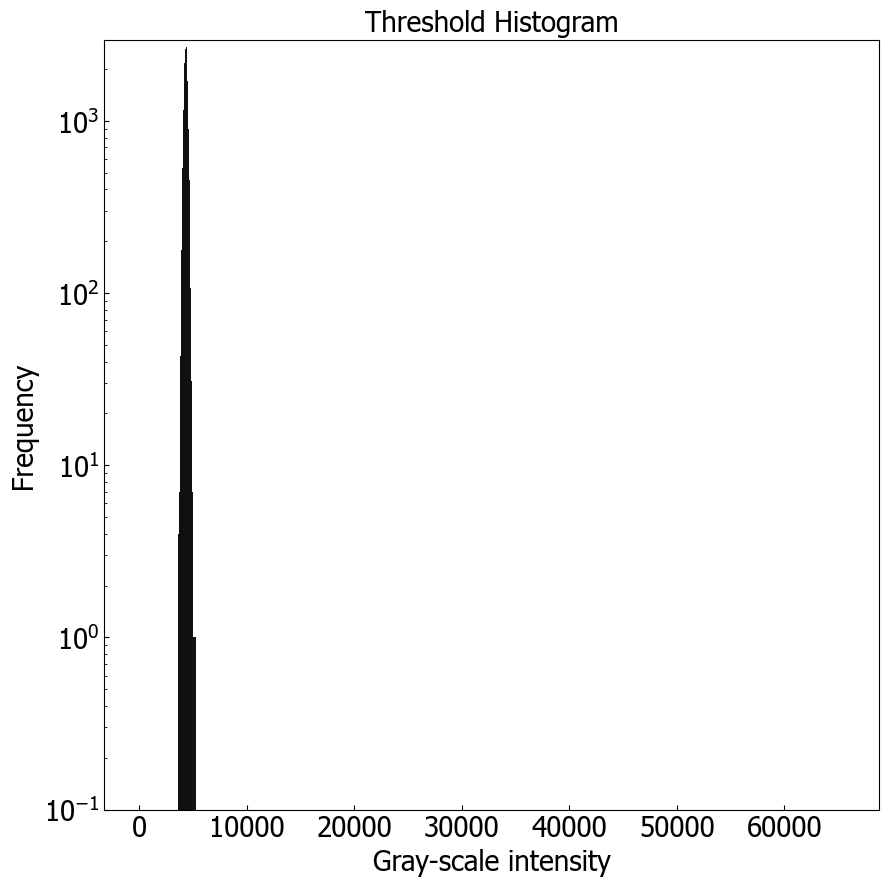

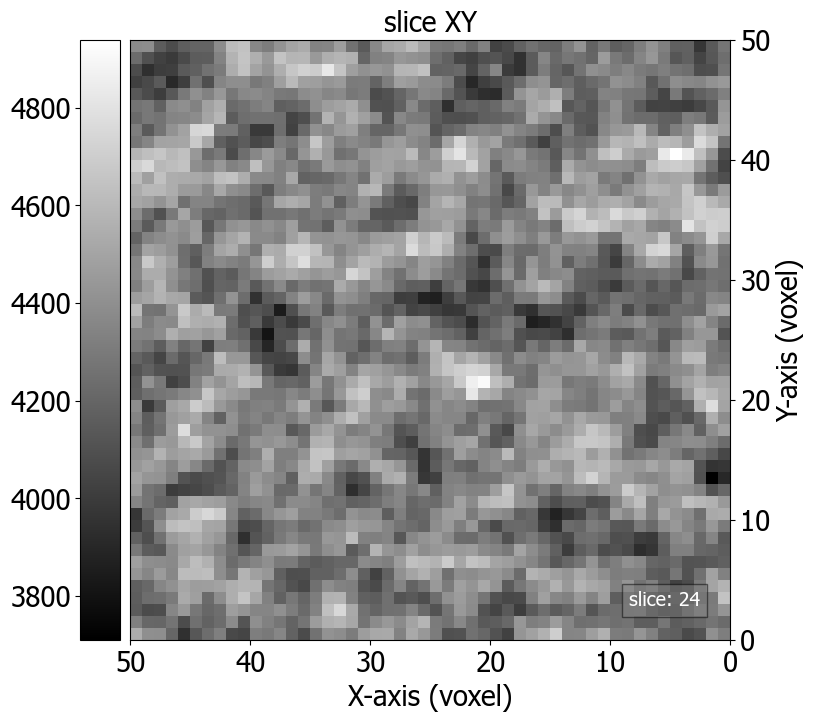

In [ ]:
fig, ax = image.histogram(data=data, 
                          paramsfile=params_file_raw, title=None, log_scale='y', dark_mode=False, cmap_set='gray')

image.save_figure(fig, filename='figure_grayscale_hist')

fig, ax, pcm = image.ortho_slice(data=data,
                                 paramsfile=params_file_raw, cmap_set='gray', slice=None, plane='xy', subvolume=None, labels=None, title='slice XY', voxel_size=None, dark_mode=False, cmap_intensity=1, ax=None, show_colorbar=True)

image.save_figure(fig, filename='figure_grayscale_slice')

## Output

Both figures are automatically saved to the `output/` folder with the specified filenames:
- `figure_grayscale_hist.png`: The histogram plot
- `figure_grayscale_slice.png`: The orthogonal slice view

You can find these files in your working directory under `output/`.